In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt

from seaborn import heatmap
from seaborn import countplot
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

c:\Users\MatsN\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [3]:
df = pd.read_csv('../Felles/TrondheimHousingDataCleaned.csv', sep = ',')
df.head()

,Matrikkel / Org-Anr,Address,Housing type,Primary room,Usable area,Gross area,Year of construction,Floor,Plot size,Last sold,...,Lon,Year,Month,Day,Policy rate,CPI,Change CPI,HPI Norway,HPI Trondheim,Borrowing rate%
0,5001-20/88/0/0,"Skogvegen 32, 7058 CHARLOTTENLUND",Selveier enebolig,441,517,567,2007.0,0,970.8,2021-02-28,...,10.4927,2021,2,28,0.0,115.3,0.7,130.7,123.5,1.77
1,5001-410/683/0/34,"Dyre Halses gate 11, 7042 TRONDHEIM",Selveierleilighet,55,55,60,2004.0,7,1043.2,2021-03-01,...,10.4134,2021,3,1,0.0,115.0,-0.3,130.7,123.5,1.77
2,5001-404/418/0/69,"Tellefsens gate 8, 7030 TRONDHEIM",Selveierleilighet,135,144,144,2019.0,5,3673.0,2021-03-01,...,10.3973,2021,3,1,0.0,115.0,-0.3,130.7,123.5,1.77
3,5001-52/224/0/128,"Heggdalsringen 65, 7049 TRONDHEIM",Selveierleilighet,69,73,73,2019.0,5,4572.6,2021-03-01,...,10.4535,2021,3,1,0.0,115.0,-0.3,130.7,123.5,1.77
4,5001-76/267/0/15,"Siriusvegen 10 A, 7037 TRONDHEIM",Selveierleilighet,74,74,81,1995.0,3,9300.8,2021-03-01,...,10.4113,2021,3,1,0.0,115.0,-0.3,130.7,123.5,1.77


In [4]:
df.columns

Index(['Matrikkel / Org-Anr', 'Address', 'Housing type', 'Primary room',
       'Usable area', 'Gross area', 'Year of construction', 'Floor',
       'Plot size', 'Last sold', 'Price', 'Joint debt at last sale',
       'Total price at last sale', 'Number of rooms', 'Number of bedrooms',
       'Registered date', 'Turnover rate', 'Broker', 'Postal code',
       'Broker encoded', 'Housing type encoded', 'Balcony_Yes', 'Parking_Yes',
       'Lat', 'Lon', 'Year', 'Month', 'Day', 'Policy rate', 'CPI',
       'Change CPI', 'HPI Norway', 'HPI Trondheim', 'Borrowing rate%'],
      dtype='object')

In [5]:
X = df.select_dtypes(include = ['int','float']).drop(columns = ['Price', 'Total price at last sale'])
y = df['Total price at last sale']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size = 0.3)

In [7]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

Below we try different models with different amount of estimators. In other words, this is the amount of trees made in the random forest regressor.

In [8]:
model_1 = RandomForestRegressor(random_state = 42, n_estimators= 10)
model_1.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10, random_state=42)

In [9]:
model_2 = RandomForestRegressor(random_state = 42, n_estimators= 20)
model_2.fit(X_train, y_train)

RandomForestRegressor(n_estimators=20, random_state=42)

In [10]:
model_3 = RandomForestRegressor(random_state = 42, n_estimators= 30)
model_3.fit(X_train, y_train)

RandomForestRegressor(n_estimators=30, random_state=42)

In [11]:
model_4 = RandomForestRegressor(random_state = 42, n_estimators= 40)
model_4.fit(X_train, y_train)

RandomForestRegressor(n_estimators=40, random_state=42)

In [12]:
model_5 = RandomForestRegressor(random_state = 42, n_estimators= 50)
model_5.fit(X_train, y_train)

RandomForestRegressor(n_estimators=50, random_state=42)

In [13]:
print("Model 1 score is: ", model_1.score(X_test, y_test))
print("Model 2 score is: ", model_2.score(X_test, y_test))
print("Model 3 score is: ", model_3.score(X_test, y_test))
print("Model 4 score is: ", model_4.score(X_test, y_test))
print("Model 5 score is: ", model_5.score(X_test, y_test))

Model 1 score is:  0.8524944457962265
Model 2 score is:  0.8602248946840316
Model 3 score is:  0.8632569938117154
Model 4 score is:  0.8648732490049472
Model 5 score is:  0.8641650922001083


To save computational power, we will use Model 4 as it has a good score and further increase in amount of trees will not lead to a higher score. The more trees, the more computational power is needed. 

In [14]:
print("Model 4 train score is: ", model_4.score(X_train, y_train))
print("Model 4 test score is: ", model_4.score(X_test, y_test))

Model 4 train score is:  0.9757377913198887
Model 4 test score is:  0.8648732490049472


In [15]:
model_41 = RandomForestRegressor(random_state= 42, n_estimators = 40, max_depth = 20)
model_41.fit(X_train, y_train)

RandomForestRegressor(max_depth=20, n_estimators=40, random_state=42)

In [16]:
print("Model 4.1 train score is: ", model_41.score(X_train, y_train))
print("Model 4.1 test score is: ", model_41.score(X_test, y_test))

Model 4.1 train score is:  0.9752652760334647
Model 4.1 test score is:  0.8666142666115759


In [17]:
scores_rfr = cross_val_score(model_41,X_train, y_train,cv=10,scoring='explained_variance')
print("Est. explained variance: %0.2f (+/- %0.2f)" % (scores_rfr.mean(), scores_rfr.std() * 2))

Est. explained variance: 0.84 (+/- 0.05)


Source of code: https://www.kaggle.com/code/adachowicz/house-prices-random-forest-regression-analysis

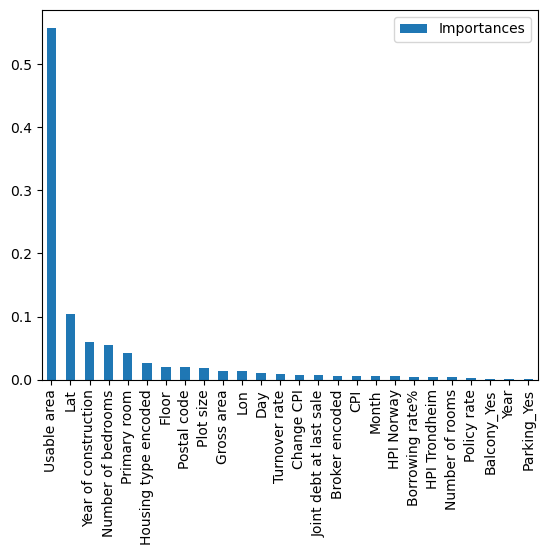

In [18]:

importances = pd.DataFrame(model_41.feature_importances_, columns = ['Importances'],
                                                        index = X_train.columns)
importances.sort_values(by = ['Importances'], axis = 0, ascending = False, inplace = True)

importances.plot(kind = 'bar')
plt.show()

In [19]:
fimp = pd.DataFrame({'Columns' : X_train.columns, 'Importance': model_41.feature_importances_})
fimp = fimp.sort_values(by = 'Importance', ascending = False)
fimp = fimp.reset_index(drop=True)
fimp

,Columns,Importance
0,Usable area,0.558535
1,Lat,0.103770
2,Year of construction,0.058997
3,Number of bedrooms,0.054264
4,Primary room,0.041365
5,Housing type encoded,0.025435
6,Floor,0.020289
7,Postal code,0.020157
8,Plot size,0.018362
9,Gross area,0.013896


In [35]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

predictions = model_41.predict(X_test)

mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
rmse = np.sqrt(mse)

f_mse = "{:,.2f}".format(mse)
f_mae = "{:,.2f}".format(mae)
f_rmse = "{:,.2f}".format(rmse)

print("Mean Squared Error (MSE):", f_mse)
print("Mean Absolute Error (MAE):", f_mae)
print("Root Mean Squared Error (RMSE):", f_rmse)


Mean Squared Error (MSE): 579,051,333,337.59
Mean Absolute Error (MAE): 418,846.87
Root Mean Squared Error (RMSE): 760,954.23


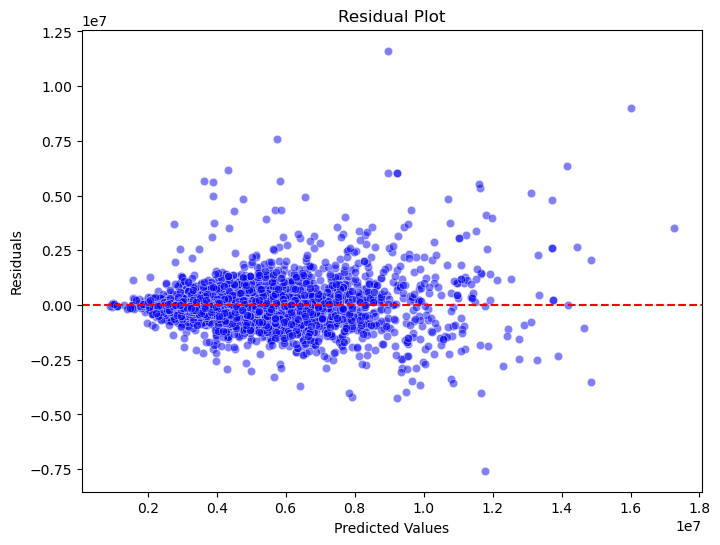

In [36]:
import seaborn as sns

# Calculate residuals
residuals = y_test - predictions

# Plot residuals
plt.figure(figsize=(8, 6))
sns.scatterplot(x=predictions, y=residuals, color='blue', alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()


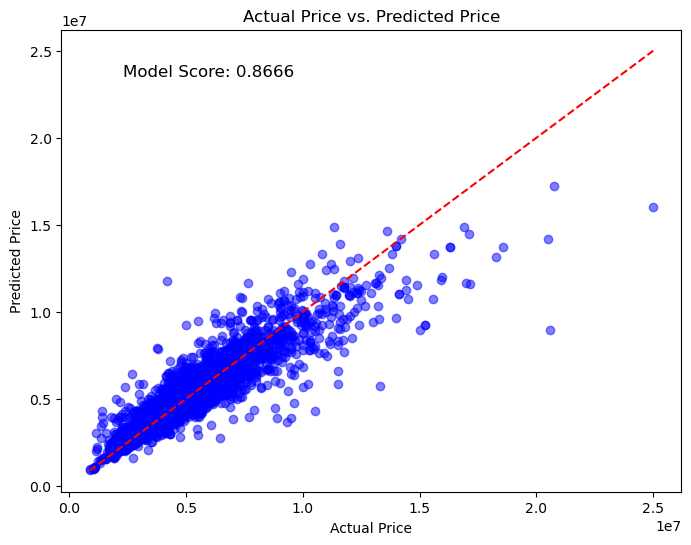

In [50]:
model_score = model_41.score(X_test, y_test)

# Plot predicted price vs. actual price
plt.figure(figsize=(8, 6))
plt.scatter(y_test, predictions, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], linestyle='--', color='red')  # Plot the diagonal line
plt.title('Actual Price vs. Predicted Price')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.text(0.1, 0.9, f'Model Score: {model_score:.4f}', transform=plt.gca().transAxes, fontsize=12, ha='left')
plt.show()


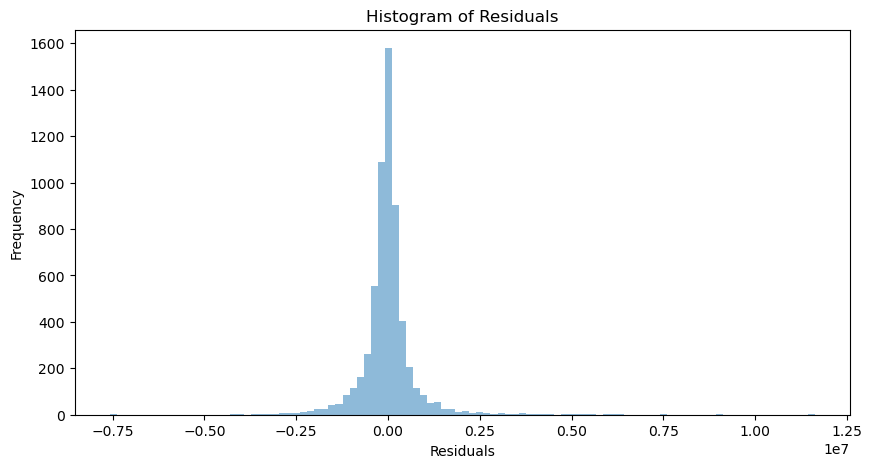

In [48]:
# Plot a histogram of residuals
plt.figure(figsize=(10, 5))
plt.hist(residuals, bins=100, alpha=0.5)
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()


The model is overfitting...

In [51]:
model_42 = RandomForestRegressor(random_state= 42, n_estimators = 40, max_depth = 20, criterion= "absolute_error")
model_42.fit(X_train, y_train)

RandomForestRegressor(criterion='absolute_error', max_depth=20, n_estimators=40,
                      random_state=42)

In [52]:
print(model_42.score(X_test, y_test))
print(model_42.score(X_train, y_train))

0.8610904534822632
0.9731488231471872


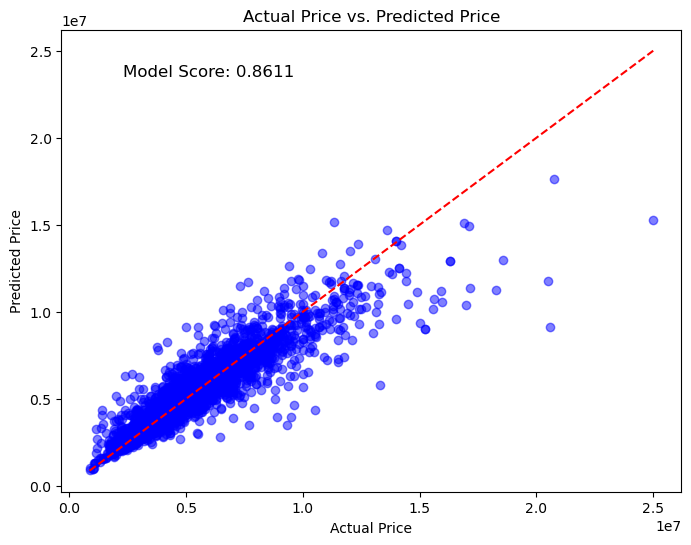

In [54]:
model_score42 = model_42.score(X_test, y_test)
predictions42 = model_42.predict(X_test)

# Plot predicted price vs. actual price
plt.figure(figsize=(8, 6))
plt.scatter(y_test, predictions42, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], linestyle='--', color='red')  # Plot the diagonal line
plt.title('Actual Price vs. Predicted Price')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.text(0.1, 0.9, f'Model Score: {model_score42:.4f}', transform=plt.gca().transAxes, fontsize=12, ha='left')
plt.show()
